In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
trainset=pd.read_csv('train.csv')
testset=pd.read_csv('test.csv')

In [3]:
trainset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
testset.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
#remove duplicates if any
trainset.drop_duplicates(inplace=True)
testset.drop_duplicates(inplace=True)

In [6]:
trainset.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
testset.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [8]:
trainset.value_counts('target')

target
0    4342
1    3271
dtype: int64

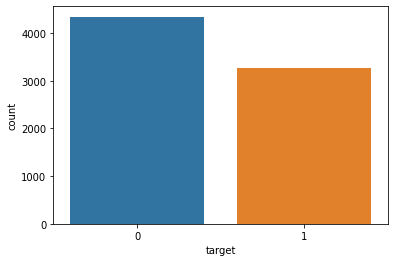

In [9]:
ax = sns.countplot(x="target", data=trainset)

Words in tweet

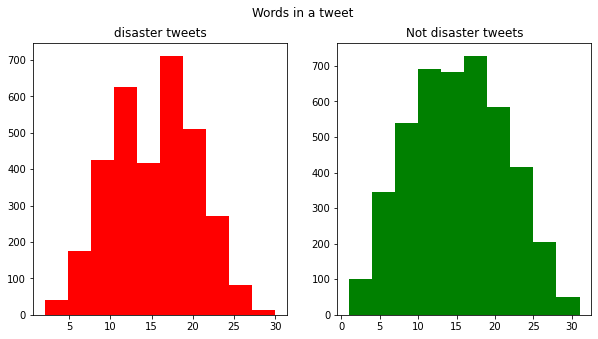

In [10]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=trainset[trainset['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=trainset[trainset['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

Location Column

In [11]:
trainset[trainset['location'].isna()]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [12]:
trainset.value_counts('location')

location
USA                            104
New York                        71
United States                   50
London                          45
Canada                          29
                              ... 
Republica Dominicana             1
Republic of the Philippines      1
Regalo Island                    1
Redondo Beach, CA                1
                                 1
Length: 3341, dtype: int64

In [13]:
#unique locations
print(trainset.location.nunique())

3341


In [14]:
print(testset.location.nunique())

1602


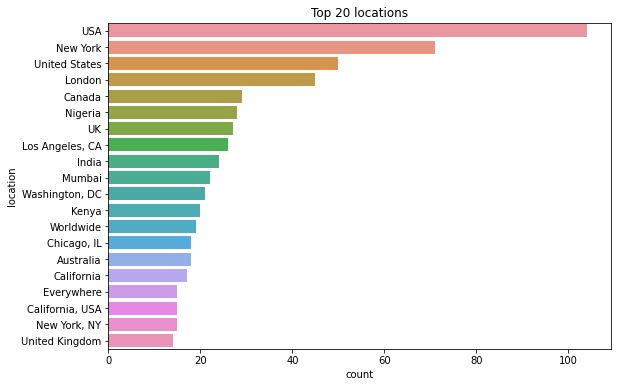

In [15]:
# Most common locations appearing in the tweets in the train set
plt.figure(figsize=(9,6))
sns.countplot(y=trainset.location, order = trainset.location.value_counts().iloc[:20].index)
plt.title('Top 20 locations')
plt.show()

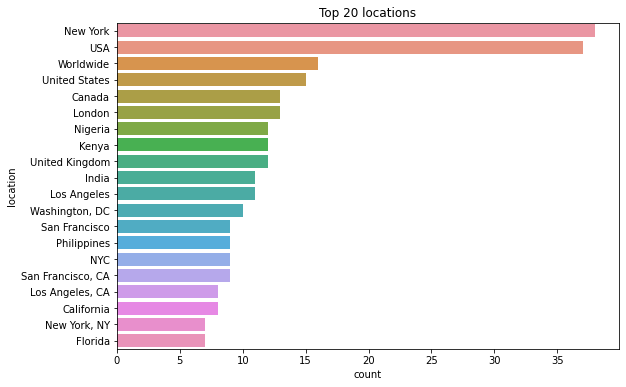

In [16]:
# Most common locations appearing in the tweets in the test set
plt.figure(figsize=(9,6))
sns.countplot(y=testset.location, order = testset.location.value_counts().iloc[:20].index)
plt.title('Top 20 locations')
plt.show()

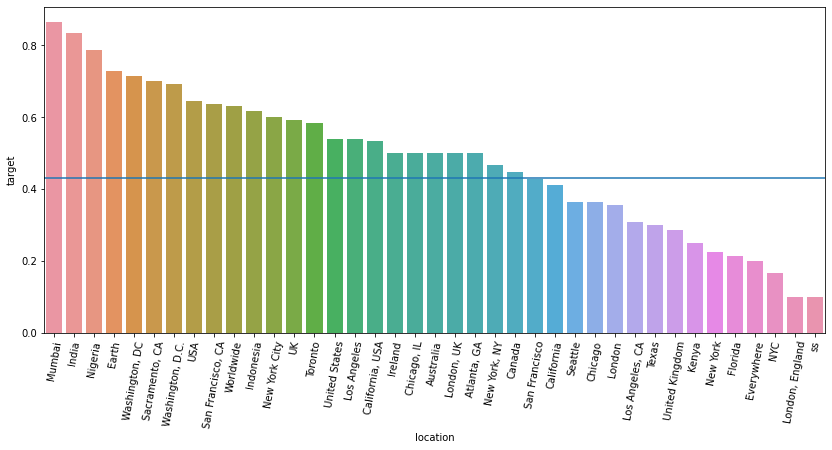

In [17]:
# % of disaster tweets for the common locations
raw_loc = trainset.location.value_counts()
top_loc = list(raw_loc[raw_loc>=10].index)
top_only = trainset[trainset.location.isin(top_loc)]

top_l = top_only.groupby('location').mean()['target'].sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=top_l.index, y=top_l)
plt.axhline(np.mean(trainset.target))
plt.xticks(rotation=80)
plt.show()

In [18]:
#filling null location values
trainset['location'] = trainset['location'].fillna('None')
testset['location'] = testset['location'].fillna('None')

In [19]:
def encode_loc(x):
    if x == 'None':
        return 'None'
    elif x == 'Earth' or x =='Worldwide' or x == 'Everywhere':
        return 'World'
    elif 'New York' in x or 'NYC' in x:
        return 'New York'    
    elif 'London' in x:
        return 'London'
    elif 'Mumbai' in x:
        return 'Mumbai'
    elif 'Washington' in x and 'D' in x and 'C' in x:
        return 'Washington DC'
    elif 'San Francisco' in x:
        return 'San Francisco'
    elif 'Los Angeles' in x:
        return 'Los Angeles'
    elif 'Seattle' in x:
        return 'Seattle'
    elif 'Chicago' in x:
        return 'Chicago'
    elif 'Toronto' in x:
        return 'Toronto'
    elif 'Sacramento' in x:
        return 'Sacramento'
    elif 'Atlanta' in x:
        return 'Atlanta'
    elif 'California' in x:
        return 'California'
    elif 'Florida' in x:
        return 'Florida'
    elif 'Texas' in x:
        return 'Texas'
    elif 'United States' in x or 'USA' in x:
        return 'USA'
    elif 'United Kingdom' in x or 'UK' in x or 'Britain' in x:
        return 'UK'
    elif 'Canada' in x:
        return 'Canada'
    elif 'India' in x:
        return 'India'
    elif 'Kenya' in x:
        return 'Kenya'
    elif 'Nigeria' in x:
        return 'Nigeria'
    elif 'Australia' in x:
        return 'Australia'
    elif 'Indonesia' in x:
        return 'Indonesia'
    elif x in top_loc:
        return x
    else: return 'Others'
trainset['location'] = trainset['location'].apply(lambda x: encode_loc(str(x)))
testset['location'] = testset['location'].apply(lambda x: encode_loc(str(x)))

In [20]:
trainset['location'].isnull().sum()

0

In [21]:
testset['location'].isnull().sum()

0

Keyword column

In [22]:
trainset.value_counts('keyword')

keyword
fatalities               45
deluge                   42
armageddon               42
body%20bags              41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Length: 221, dtype: int64

In [23]:
testset.value_counts('keyword')

keyword
deluged               23
rubble                22
demolished            22
first%20responders    21
obliteration          21
                      ..
forest%20fire          5
threat                 5
fatalities             5
inundation             4
epicentre              1
Length: 221, dtype: int64

In [24]:
print(trainset.keyword.nunique())

221


In [25]:
print(testset.keyword.nunique())

221


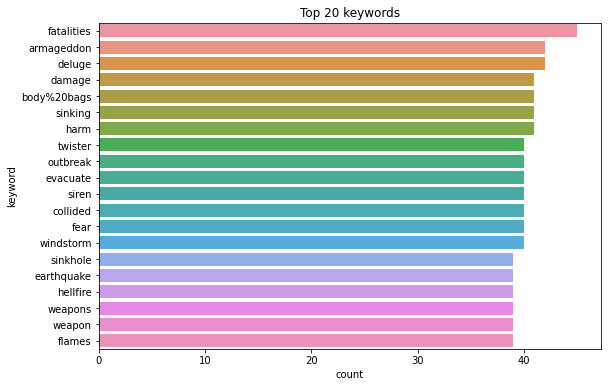

In [26]:
# Most common keywords appearing in the tweets in the train set
plt.figure(figsize=(9,6))
sns.countplot(y=trainset.keyword, order = trainset.keyword.value_counts().iloc[:20].index)
plt.title('Top 20 keywords')
plt.show()

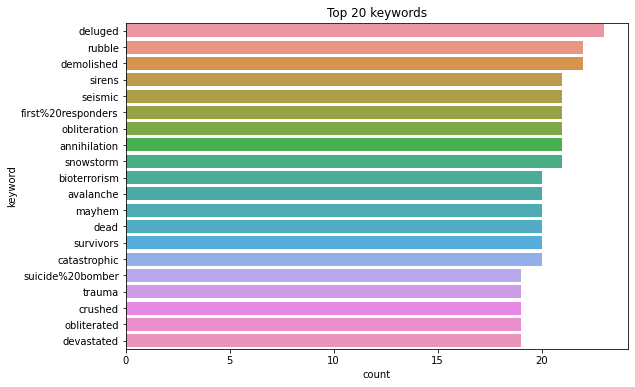

In [27]:
# Most common keywords appearing in the tweets in the test set
plt.figure(figsize=(9,6))
sns.countplot(y=testset.keyword, order = testset.keyword.value_counts().iloc[:20].index)
plt.title('Top 20 keywords')
plt.show()

In [28]:
#filling null keyword values
trainset['keyword'] = trainset['keyword'].fillna('None')
testset['keyword'] = testset['keyword'].fillna('None')

In [29]:
#cleaning keyword column
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus_keytrain=[]
for i in range(0,7613):
  keyword=re.sub('[^a-zA-Z]',' ',trainset['keyword'][i])
  keyword=keyword.lower()
  keyword=keyword.split()
  ps=PorterStemmer()
  all_stopwords=stopwords.words('english')
  keyword=[ps.stem(word) for word in keyword if not word in set(all_stopwords)]
  keyword=' '.join(keyword)
  corpus_keytrain.append(keyword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
#cleaning keyword column
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus_keytest=[]
for i in range(0,3263):
  keywordt=re.sub('[^a-zA-Z]',' ',testset['keyword'][i])
  keywordt=keywordt.lower()
  keywordt=keywordt.split()
  ps=PorterStemmer()
  all_stopwords=stopwords.words('english')
  keywordt=[ps.stem(word) for word in keywordt if not word in set(all_stopwords)]
  keywordt=' '.join(keywordt)
  corpus_keytest.append(keywordt)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
#onehot encoding location and keyword
trainset= pd.get_dummies(trainset,columns=['location'], prefix_sep='_', drop_first=True)
testset= pd.get_dummies(testset,columns=['location'], prefix_sep='_', drop_first=True)


In [32]:
trainset.head()

,id,keyword,text,target,location_Australia,location_California,location_Canada,location_Chicago,location_Florida,location_India,location_Indonesia,location_Ireland,location_Kenya,location_London,location_Los Angeles,location_Mumbai,location_New York,location_Nigeria,location_None,location_Others,location_Sacramento,location_San Francisco,location_Seattle,location_Texas,location_Toronto,location_UK,location_USA,location_Washington DC,location_World,location_ss
0,1,None,Our Deeds are the Reason of this #earthquake M...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,4,None,Forest fire near La Ronge Sask. Canada,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,5,None,All residents asked to 'shelter in place' are ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,6,None,"13,000 people receive #wildfires evacuation or...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,7,None,Just got sent this photo from Ruby #Alaska as ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [33]:
trainset.drop(['id'], axis = 1,inplace=True)
testset.drop(['id'], axis = 1,inplace=True)

In [34]:
trainset.shape    

(7613, 29)

In [35]:
testset.shape

(3263, 28)

In [36]:
testset.head()

,keyword,text,location_Australia,location_California,location_Canada,location_Chicago,location_Florida,location_India,location_Indonesia,location_Ireland,location_Kenya,location_London,location_Los Angeles,location_Mumbai,location_New York,location_Nigeria,location_None,location_Others,location_Sacramento,location_San Francisco,location_Seattle,location_Texas,location_Toronto,location_UK,location_USA,location_Washington DC,location_World,location_ss
0,None,Just happened a terrible car crash,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,None,"Heard about #earthquake is different cities, s...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,None,"there is a forest fire at spot pond, geese are...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,None,Apocalypse lighting. #Spokane #wildfires,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,None,Typhoon Soudelor kills 28 in China and Taiwan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [37]:
trainset.head()

,keyword,text,target,location_Australia,location_California,location_Canada,location_Chicago,location_Florida,location_India,location_Indonesia,location_Ireland,location_Kenya,location_London,location_Los Angeles,location_Mumbai,location_New York,location_Nigeria,location_None,location_Others,location_Sacramento,location_San Francisco,location_Seattle,location_Texas,location_Toronto,location_UK,location_USA,location_Washington DC,location_World,location_ss
0,None,Our Deeds are the Reason of this #earthquake M...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,None,Forest fire near La Ronge Sask. Canada,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,None,All residents asked to 'shelter in place' are ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,None,"13,000 people receive #wildfires evacuation or...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,None,Just got sent this photo from Ruby #Alaska as ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [38]:
X_train_features=trainset.iloc[:,3:30].values
X_test_features=testset.iloc[:,2:29].values

In [39]:
X_train_features.shape

(7613, 26)

In [40]:
X_test_features.shape

(3263, 26)

Cleaning the text

In [41]:
import re
import nltk
nltk.download('stopwords')    
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,7613):
  text=re.sub('[^a-zA-Z]',' ',trainset['text'][i])
  text=text.lower()
  text=text.split()
  ps=PorterStemmer()
  all_stopwords=stopwords.words('english')
  text=[ps.stem(word) for word in text if not word in set(all_stopwords)]
  text=' '.join(text)
  corpus.append(text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
print(corpus)

['deed reason earthquak may allah forgiv us', 'forest fire near la rong sask canada', 'resid ask shelter place notifi offic evacu shelter place order expect', 'peopl receiv wildfir evacu order california', 'got sent photo rubi alaska smoke wildfir pour school', 'rockyfir updat california hwi close direct due lake counti fire cafir wildfir', 'flood disast heavi rain caus flash flood street manit colorado spring area', 'top hill see fire wood', 'emerg evacu happen build across street', 'afraid tornado come area', 'three peopl die heat wave far', 'haha south tampa get flood hah wait second live south tampa gonna gonna fvck flood', 'rain flood florida tampabay tampa day lost count', 'flood bago myanmar arriv bago', 'damag school bu multi car crash break', 'man', 'love fruit', 'summer love', 'car fast', 'goooooooaaaaaal', 'ridicul', 'london cool', 'love ski', 'wonder day', 'looooool', 'way eat shit', 'nyc last week', 'love girlfriend', 'cooool', 'like pasta', 'end', 'bbcmtd wholesal market 

In [43]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus_test=[]
for i in range(0,3263):
  text=re.sub('[^a-zA-Z]',' ',testset['text'][i])
  text=text.lower()
  text=text.split()
  ps=PorterStemmer()
  all_stopwords=stopwords.words('english')
  text=[ps.stem(word) for word in text if not word in set(all_stopwords)]
  text=' '.join(text)
  corpus_test.append(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
print(corpus_test)

['happen terribl car crash', 'heard earthquak differ citi stay safe everyon', 'forest fire spot pond gees flee across street cannot save', 'apocalyps light spokan wildfir', 'typhoon soudelor kill china taiwan', 'shake earthquak', 'probabl still show life arsen yesterday eh eh', 'hey', 'nice hat', 'fuck', 'like cold', 'nooooooooo', 'tell', '', 'awesom', 'birmingham wholesal market ablaz bbc news fire break birmingham wholesal market http co irwqcezweu', 'sunkxssedharri wear short race ablaz', 'previouslyondoyintv toke makinwa marriag crisi set nigerian twitter ablaz http co cmghxba xi', 'check http co roi nsmejj http co tj zjin http co yduixefip http co lxtjc kl nsfw', 'psa split person techi follow ablaz co burner follow ablaz', 'bewar world ablaz sierra leon amp guap', 'burn man ablaz turban diva http co hodwosamw via etsi', 'diss song peopl take thing run smh eye open though set game ablaz cyhitheprync', 'rape victim die set ablaz year old girl die burn injuri set ablaz http co uk hn

Creating Bag of Words model

In [45]:
from sklearn.feature_extraction.text import CountVectorizer    
cv=CountVectorizer(max_features=1500)
X_train=cv.fit_transform(corpus).toarray()
X_test=cv.fit_transform(corpus_test).toarray()
X_train_kw=cv.fit_transform(corpus_keytrain).toarray()
X_test_kw=cv.fit_transform(corpus_keytest).toarray()
y_train=trainset.iloc[:,2].values

In [46]:
X_train.shape

(7613, 1500)

In [47]:
X_train_kw.shape

(7613, 174)

In [48]:
X_train = np.concatenate((X_train, X_train_features,X_train_kw),axis=1)
X_test = np.concatenate((X_test, X_test_features,X_test_kw),axis=1)

In [49]:
print(X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


Splitting training set

In [50]:
from sklearn.model_selection import train_test_split
X_train1,X_val,y_train1,y_val=train_test_split(X_train,y_train,test_size=0.2)

Training Naive Bayes on the Training set

In [51]:
from sklearn.naive_bayes import GaussianNB
classifier1=GaussianNB()
classifier1.fit(X_train1,y_train1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
y_pred1=classifier1.predict(X_val)
print(y_pred1)

[0 1 0 ... 1 1 0]


In [53]:
print(np.concatenate((y_pred1.reshape(len(y_pred1),1),y_val.reshape(len(y_val),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [0 0]]


In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_val,y_pred1)
print(cm)
accuracy_score(y_val,y_pred1) 

[[764  94]
 [243 422]]


0.7787261982928431

Training Logistic Regression on the training set

In [55]:
from sklearn.linear_model import LogisticRegression
classifier2=LogisticRegression()
classifier2.fit(X_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred2=classifier2.predict(X_val)
print(y_pred2)

[1 1 0 ... 1 1 0]


In [57]:
print(np.concatenate((y_pred2.reshape(len(y_pred2),1),y_val.reshape(len(y_val),1)),1))

[[1 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [0 0]]


In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_val,y_pred2)
print(cm)
accuracy_score(y_val,y_pred2) 

[[733 125]
 [188 477]]


0.7944845699277742

Training Decision Tree Classifier on training set

In [59]:
from sklearn.tree import DecisionTreeClassifier
classifier3=DecisionTreeClassifier(criterion='entropy')
classifier3.fit(X_train1,y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
y_pred3=classifier3.predict(X_val)
print(y_pred3)

[0 1 0 ... 1 0 0]


In [61]:
print(np.concatenate((y_pred3.reshape(len(y_pred3),1),y_val.reshape(len(y_val),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 1]
 [0 0]]


In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_val,y_pred3)
print(cm)
accuracy_score(y_val,y_pred3) 

[[669 189]
 [220 445]]


0.7314510833880499

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_val,y_pred3))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       858
           1       0.70      0.67      0.69       665

    accuracy                           0.73      1523
   macro avg       0.73      0.72      0.73      1523
weighted avg       0.73      0.73      0.73      1523



Training KNN on the training set

In [64]:
from sklearn.neighbors import KNeighborsClassifier
classifier4=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier4.fit(X_train1,y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [65]:
y_pred4=classifier4.predict(X_val)
print(y_pred4)

[1 1 0 ... 0 0 0]


In [66]:
print(np.concatenate((y_pred4.reshape(len(y_pred4),1),y_val.reshape(len(y_val),1)),1))

[[1 0]
 [1 1]
 [0 0]
 ...
 [0 1]
 [0 1]
 [0 0]]


In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_val,y_pred4)
print(cm)
accuracy_score(y_val,y_pred4) 

[[755 103]
 [325 340]]


0.7189757058437295

Training SVM on the training set

In [68]:
from sklearn.svm import SVC
classifier5=SVC(kernel='rbf')
classifier5.fit(X_train1,y_train1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [69]:
y_pred5=classifier5.predict(X_val)
print(y_pred5)

[0 1 0 ... 1 1 0]


In [70]:
print(np.concatenate((y_pred5.reshape(len(y_pred5),1),y_val.reshape(len(y_val),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [0 0]]


In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_val,y_pred5)
print(cm)
accuracy_score(y_val,y_pred5) 

[[775  83]
 [213 452]]


0.8056467498358503

Linear SVM

In [72]:
from sklearn.svm import SVC
classifier6=SVC(kernel='linear')
classifier6.fit(X_train1,y_train1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
y_pred6=classifier6.predict(X_val)
print(y_pred6)

[0 1 0 ... 1 1 0]


In [74]:
print(np.concatenate((y_pred6.reshape(len(y_pred6),1),y_val.reshape(len(y_val),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [0 0]]


In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_val,y_pred6)
print(cm)
accuracy_score(y_val,y_pred6) 


[[718 140]
 [201 464]]


0.7760998030203545

RFC

In [76]:
from sklearn.ensemble import RandomForestClassifier
classifier7=RandomForestClassifier(n_estimators=20,criterion='entropy')
classifier7.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
y_pred7=classifier7.predict(X_val)
print(y_pred7)

[1 1 0 ... 1 1 0]


In [78]:
print(np.concatenate((y_pred7.reshape(len(y_pred7),1),y_val.reshape(len(y_val),1)),1))

[[1 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [0 0]]


In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_val,y_pred7)
print(cm)
accuracy_score(y_val,y_pred7) 

[[737 121]
 [219 446]]


0.7767564018384767

ANN

In [80]:
import tensorflow as tf
ann=tf.keras.models.Sequential()


In [81]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [82]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [83]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [84]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [85]:
ann.fit(X_train1,y_train1,batch_size=32,epochs=100)

Epoch 1/100
191/191 [==============================] - 1s 2ms/step - loss: 0.6754 - accuracy: 0.6165
Epoch 2/100
191/191 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.8178
Epoch 3/100
191/191 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8438
Epoch 4/100
191/191 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8571
Epoch 5/100
191/191 [==============================] - 0s 2ms/step - loss: 0.2971 - accuracy: 0.8854
Epoch 6/100
191/191 [==============================] - 0s 2ms/step - loss: 0.2620 - accuracy: 0.9001
Epoch 7/100
191/191 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.9046
Epoch 8/100
191/191 [==============================] - 0s 2ms/step - loss: 0.2174 - accuracy: 0.9233
Epoch 9/100
191/191 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.9228
Epoch 10/100
191/191 [==============================] - 0s 2ms/step - loss: 0.1886 - accura

In [86]:
y_pred8=ann.predict(X_val)
y_pred8=(y_pred8>0.5)
print(y_pred8)

[[ True]
 [ True]
 [False]
 ...
 [ True]
 [ True]
 [False]]


In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_val,y_pred8)
print(cm)
accuracy_score(y_val,y_pred8) 

[[685 173]
 [202 463]]


0.7537754432042022

Multinomial Naive Bayes model

In [88]:
from sklearn.naive_bayes import MultinomialNB
classifier9 = MultinomialNB()
classifier9.fit(X_train1, y_train1)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [98]:
y_pred9=classifier9.predict(X_val)
y_pred9=(y_pred9>0.5)
print(y_pred9)

[False  True False ...  True  True False]


In [99]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_val,y_pred9)
print(cm)
accuracy_score(y_val,y_pred9) 

[[722 136]
 [178 487]]


0.793827971109652

Now predicting X_test

In [91]:
y_predt1=classifier1.predict(X_test)   h
print(y_predt1)

SyntaxError: ignored

In [ ]:
result_data1 = pd.read_csv("sample_submission.csv")
output = pd.DataFrame({'id': result_data1.id, 'target': y_predt1})
output.to_csv('my_submission1.csv', index=False)



In [94]:
y_predt2=classifier2.predict(X_test)
print(y_predt2)

[1 1 1 ... 1 1 0]


In [95]:
result_data2 = pd.read_csv("sample_submission.csv")
output = pd.DataFrame({'id': result_data2.id, 'target': y_predt2})
output.to_csv('my_submission2b.csv', index=False)

In [ ]:
y_predt3=classifier3.predict(X_test)
print(y_predt3)

In [ ]:
result_data3 = pd.read_csv("sample_submission.csv")
output = pd.DataFrame({'id': result_data3.id, 'target': y_predt3})
output.to_csv('my_submission3.csv', index=False)

In [ ]:
y_predt4=classifier4.predict(X_test)
print(y_predt4)

In [ ]:
result_data4 = pd.read_csv("sample_submission.csv")
output = pd.DataFrame({'id': result_data4.id, 'target': y_predt4})
output.to_csv('my_submission4.csv', index=False)

In [96]:
y_predt5=classifier5.predict(X_test)
print(y_predt5)

[0 1 0 ... 0 0 0]


In [97]:
result_data5 = pd.read_csv("sample_submission.csv")
output = pd.DataFrame({'id': result_data5.id, 'target': y_predt5})
output.to_csv('my_submission5b.csv', index=False)